# Anomaly Detection in Transactions

## 1. Import data and check null values, check column info and the descriptive statistics of the data.

In [1]:

import pandas as pd

data = pd.read_csv('transaction_anomalies_dataset.csv')
null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()
null_values, column_info, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


(Transaction_ID                 0
 Transaction_Amount             0
 Transaction_Volume             0
 Average_Transaction_Amount     0
 Frequency_of_Transactions      0
 Time_Since_Last_Transaction    0
 Day_of_Week                    0
 Time_of_Day                    0
 Age                            0
 Gender                         0
 Income                         0
 Account_Type                   0
 dtype: int64,
 None,
        Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
 count         1000.000000         1000.000000                 1000.000000   
 mean          1038.122511            2.498000                 1000.682506   
 std            283.580055            1.115006                   20.632334   
 min            849.024392            1.000000                  939.081423   
 25%            966.028796            1.000000                  986.800556   
 50%           1002.118678            3.000000                 1000.501902   
 75%           1033.1436

## 2. Check the distribution of transaction amounts in the data.

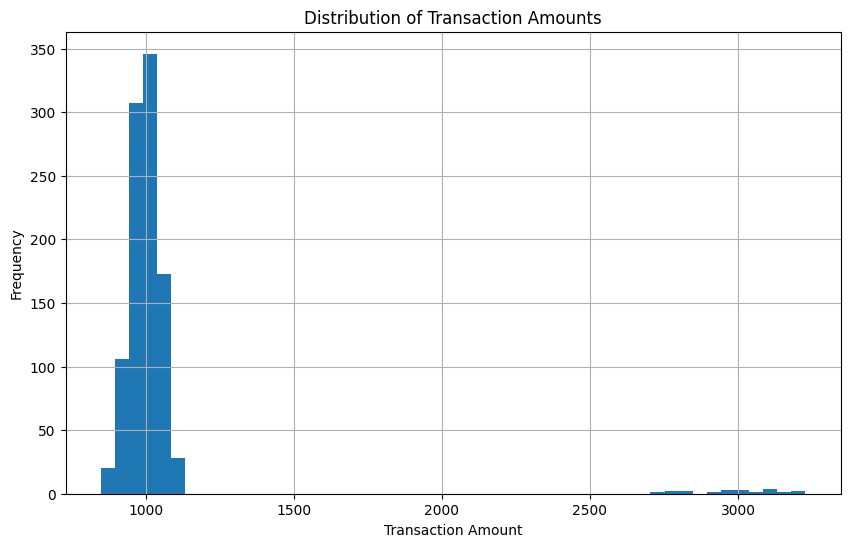

In [2]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['Transaction_Amount'].hist(bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()


## 3. Check the distribution of transaction amounts by account type.

<Figure size 1000x600 with 0 Axes>

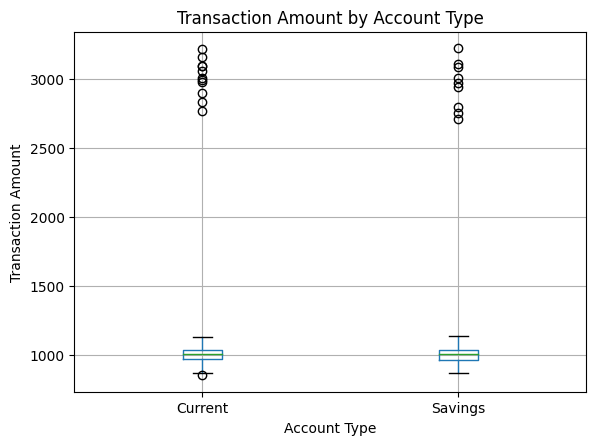

In [25]:

plt.figure(figsize=(10, 6))
data.boxplot(column='Transaction_Amount', by='Account_Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Account Type')
plt.suptitle('')
plt.show()


## 4. Check the average transaction amount by age.

In [24]:
import plotly.express as px

average_transaction_by_age = data.groupby(['Age', 'Account_Type'])['Transaction_Amount'].mean().reset_index()

filtered_data = average_transaction_by_age[(average_transaction_by_age['Transaction_Amount'] >= 940) &
                                           (average_transaction_by_age['Transaction_Amount'] <= 1080)]

fig = px.scatter(filtered_data,
                 x='Age',
                 y='Transaction_Amount',
                 color='Account_Type',
                 title="Average Transaction Amount vs. Age",
                 labels={"Transaction_Amount": "Average Transaction Amount"},
                 color_discrete_map={"Savings": "blue", "Current": "red"},
                 trendline="ols")

fig.update_layout(
    width=800,
    height=500
)

fig.show()


## 5. Check the count of transactions by day of the week.

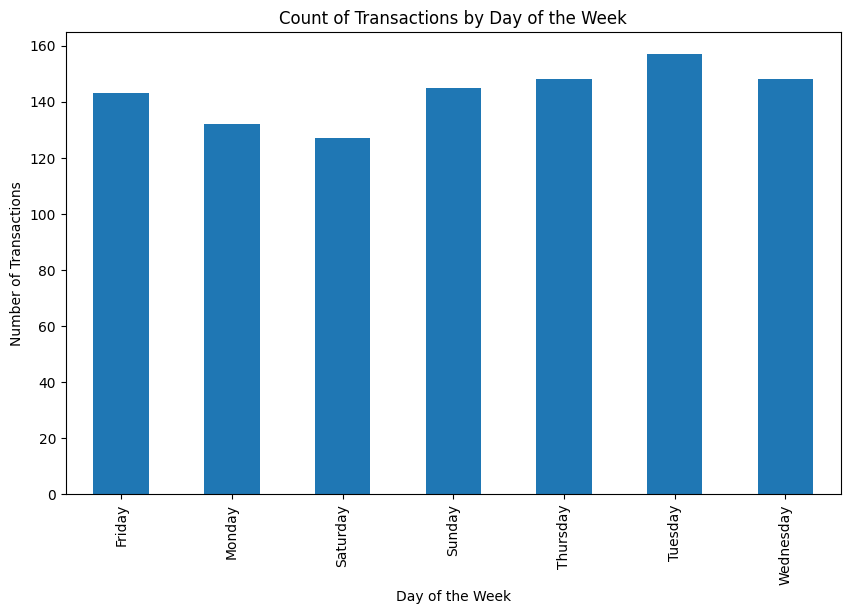

In [5]:

transaction_count_by_day = data['Day_of_Week'].value_counts().sort_index()
transaction_count_by_day.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Count of Transactions by Day of the Week')
plt.show()


## 6. Check the correlation between all the columns in the data.

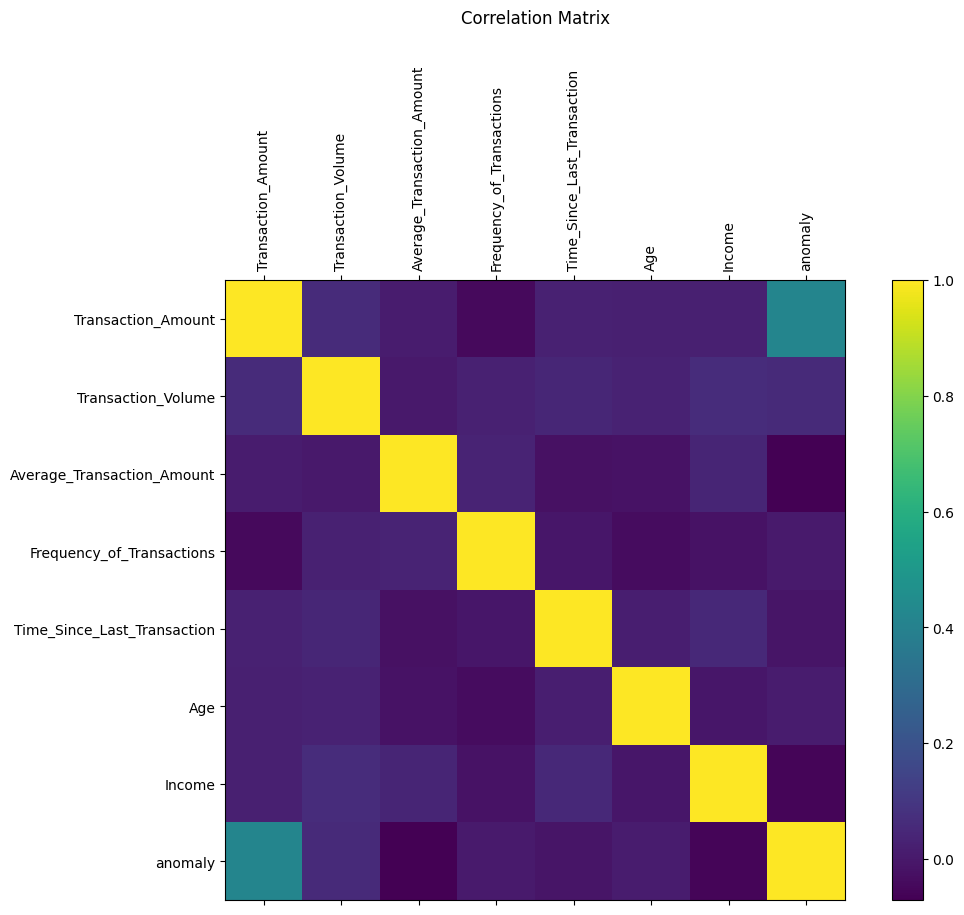

In [11]:
# Selecting only numerical columns
numerical_data = data.select_dtypes(include='number')

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix', pad=30)
plt.show()


## 7. Visualize anomalies in the data.

In [23]:
import plotly.express as px
from sklearn.ensemble import IsolationForest

features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

model = IsolationForest(contamination=0.1, random_state=42)
data['Is_Anomaly'] = model.fit_predict(data[features])

data['Is_Anomaly'] = data['Is_Anomaly'].map({1: False, -1: True})

fig = px.scatter(data,
                 x='Transaction_Amount',
                 y='Average_Transaction_Amount',
                 color='Is_Anomaly',
                 title="Anomalies in Transaction Amount",
                 labels={"Transaction_Amount": "Transaction Amount", "Average_Transaction_Amount": "Average Transaction Amount"},
                 color_discrete_map={False: "blue", True: "red"})

fig.update_layout(
    width=800,
    height=500
)

fig.show()


## 8. Calculate the number of anomalies in the data to find the ratio of anomalies in the data.

In [22]:

anomalies_count = anomalies.shape[0]
total_transactions = data.shape[0]
anomaly_ratio = anomalies_count / total_transactions
anomalies_count, anomaly_ratio


(100, 0.1)

## 9. Select the relevant features and fit them into the Machine Learning model “isolation forest” for detecting anomalies. Get the prediction and convert into binary values.

In [28]:
from sklearn.ensemble import IsolationForest

features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

model = IsolationForest(contamination=0.1, random_state=42)

model.fit(data[features])

data['Is_Anomaly'] = model.predict(data[features])

data['Is_Anomaly'] = data['Is_Anomaly'].apply(lambda x: 1 if x == -1 else 0)

data[['Transaction_ID', 'Is_Anomaly']]


,Transaction_ID,Is_Anomaly
0,TX0,0
1,TX1,0
2,TX2,0
3,TX3,1
4,TX4,0
...,...,...
995,TX995,0
996,TX996,0
997,TX997,0
998,TX998,0


## 10. Show the classification report.

In [29]:
from sklearn.metrics import classification_report

y_true = data['Is_Anomaly']
y_pred = model.predict(data[features])
y_pred = [1 if x == -1 else 0 for x in y_pred]

report = classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly'])
print(report)


              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       900
     Anomaly       1.00      1.00      1.00       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



# 11. Trained Model

In [30]:
def detect_anomaly(transaction_amount, average_transaction_amount, frequency_of_transactions):
    input_data = pd.DataFrame({
        'Transaction_Amount': [transaction_amount],
        'Transaction_Volume': [0],
        'Average_Transaction_Amount': [average_transaction_amount],
        'Frequency_of_Transactions': [frequency_of_transactions],
        'Time_Since_Last_Transaction': [0],
        'Age': [0],
        'Income': [0]
    })

    prediction = model.predict(input_data)
    if prediction[0] == -1:
        return "Anomaly detected: This transaction is flagged as an anomaly."
    else:
        return "No anomaly detected: This transaction is not flagged as an anomaly."

transaction_amount = float(input("Enter the value for 'Transaction_Amount': "))
average_transaction_amount = float(input("Enter the value for 'Average_Transaction_Amount': "))
frequency_of_transactions = int(input("Enter the value for 'Frequency_of_Transactions': "))

result = detect_anomaly(transaction_amount, average_transaction_amount, frequency_of_transactions)
print(result)


Enter the value for 'Transaction_Amount': 10000
Enter the value for 'Average_Transaction_Amount': 900
Enter the value for 'Frequency_of_Transactions': 6
Anomaly detected: This transaction is flagged as an anomaly.
